#Artificial Neural Network Regression Problem

##Importing Libraries and Dataset

In [111]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import tensorflow as tf;

In [112]:
df=pd.read_excel("/content/drive/MyDrive/Dataset/Folds5x2_pp.xlsx",sheet_name='Sheet1')
X=df.iloc[:,:-1].values;
y=df.iloc[:,-1].values;

##Splitting Dataset and Feature Scaling

In [113]:
from sklearn.model_selection import train_test_split;
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

In [114]:
from sklearn.preprocessing import StandardScaler;
sc=StandardScaler();
X_train=sc.fit_transform(X_train);
X_test=sc.transform(X_test);

##Building ANN

In [115]:
ann=tf.keras.models.Sequential();
ann.add(tf.keras.layers.Dense(6,activation='relu'));
ann.add(tf.keras.layers.Dense(6,activation='relu'));
ann.add(tf.keras.layers.Dense(1));

In [116]:
ann.compile(optimizer='adam',loss='mae');
history=ann.fit(X_train,y_train,batch_size=32,epochs=30,verbose=1,validation_data=(X_test,y_test));

Epoch 1/30
225/225 [==============================] - 0s 2ms/step - loss: 453.2221 - val_loss: 451.0994
Epoch 2/30
225/225 [==============================] - 0s 1ms/step - loss: 444.2881 - val_loss: 433.5230
Epoch 3/30
225/225 [==============================] - 0s 1ms/step - loss: 409.3262 - val_loss: 376.1929
Epoch 4/30
225/225 [==============================] - 0s 1ms/step - loss: 323.6649 - val_loss: 274.6335
Epoch 5/30
225/225 [==============================] - 0s 1ms/step - loss: 248.3482 - val_loss: 231.2894
Epoch 6/30
225/225 [==============================] - 0s 1ms/step - loss: 206.7880 - val_loss: 187.5777
Epoch 7/30
225/225 [==============================] - 0s 1ms/step - loss: 157.0551 - val_loss: 132.1037
Epoch 8/30
225/225 [==============================] - 0s 1ms/step - loss: 106.2968 - val_loss: 89.3444
Epoch 9/30
225/225 [==============================] - 0s 1ms/step - loss: 76.6927 - val_loss: 66.8801
Epoch 10/30
225/225 [==============================] - 0s 1ms/step 

##Predicting for Test dataset

In [117]:
y_pred=ann.predict(X_test);
from sklearn.metrics import mean_absolute_error;
mean_absolute_error(y_pred,y_test)

3.6098753137492823

##Visualize Model

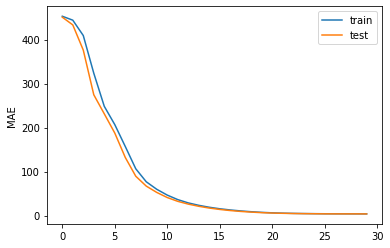

In [118]:
plt.plot(history.history['loss'],label='train');
plt.plot(history.history['val_loss'],label='test');
plt.ylabel("MAE");
plt.legend();
plt.plot();

In [119]:
ann.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 6)                 30        
_________________________________________________________________
dense_37 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 7         
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


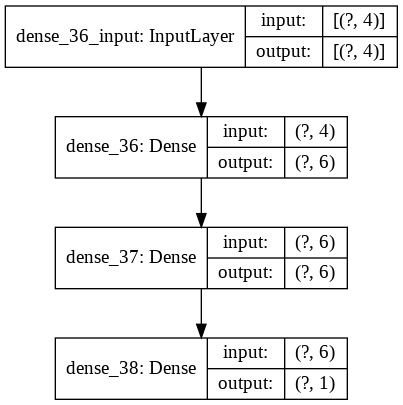

In [120]:
from tensorflow.keras.utils import plot_model;
plot_model(ann,show_shapes=True)